In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

desired_width = 500
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 100)

In [ ]:
# from google.colab import files
# uploaded = files.upload()

In [ ]:
airbnb_100 = pd.read_excel('airbnb_100.xlsx', index_col=0)
airbnb_random = pd.read_excel('airbnb_random.xlsx', index_col=0)
landmarks = pd.read_excel('Landmarks.xlsx')

print(airbnb_100.head())
print(airbnb_random.head())
print(landmarks.head())

FileNotFoundError: ignored

In [ ]:
# !pip install haversine
from haversine import haversine

def calculate_distance(data_df, landmarks_df, city):
  data_df_city = data_df.copy().loc[data_df['city']==city, :]
  landmarks_df_city = landmarks_df.copy().loc[landmarks_df['city']==city, :]

  data_latlong = data_df_city[['latitude', 'longitude']].astype('float')
  land_latlong = landmarks_df_city[['latitude', 'longitude']].astype('float')

  land_dist_list = []
  for i in data_latlong.index:
    dist_idx_list = []

    for j in land_latlong.index:
      data = data_latlong.loc[i, :]
      land = land_latlong.loc[j, :]
      # 하버 사인 거리 계산
      dist = haversine(data, land, unit='km')
      dist_idx_list.append([j, dist])

    dist_idx_list = np.array(dist_idx_list).reshape(-1, 2).T
    land_name = landmarks_df_city.loc[int(dist_idx_list[0][np.argmin(dist_idx_list[1])])]['landmark']
    distance = np.min(dist_idx_list[1])
    
    land_dist_list.append([land_name, distance])
  
  land_dist_list = np.array(land_dist_list).reshape(-1, 2)

  data_df_city['landmark'] = land_dist_list[:, 0]
  data_df_city['distance'] = land_dist_list[:, 1]
  data_df_city['distance'] = data_df_city['distance'].astype('float')
  
  print("******%s******" % city)
  print(data_df_city.head(10))
  print(data_df_city.tail(10))

  return data_df_city, landmarks_df_city

In [ ]:
airbnb_100_NYC, landmarks_NYC = calculate_distance(airbnb_100, landmarks, 'NYC')
airbnb_100_LA, landmarks_LA = calculate_distance(airbnb_100, landmarks, 'LA')
airbnb_100_SF, landmarks_SF = calculate_distance(airbnb_100, landmarks, 'SF')

airbnb_random_NYC, _ = calculate_distance(airbnb_random, landmarks, 'NYC')
airbnb_random_LA, _ = calculate_distance(airbnb_random, landmarks, 'LA')
airbnb_random_SF, _ = calculate_distance(airbnb_random, landmarks, 'SF')

******NYC******
     log_price property_type        room_type  accommodates  bathrooms       bed_type cancellation_policy  cleaning_fee city                                        description host_has_profile_pic host_identity_verified  host_response_rate instant_bookable   latitude  longitude       neighbourhood  number_of_reviews  review_scores_rating  bedrooms  beds                landmark  distance
107   4.007333     Apartment     Private room             2        1.0       Real Bed            flexible         False  NYC  Hi, One bedroom in highrise appartment complex...                    t                      t                0.90                f  40.822000 -73.936811              Harlem                144                  96.0       1.0     2            Central Park  5.179461
123   4.317488     Apartment     Private room             4        1.0       Real Bed              strict         False  NYC  You are not just our guest, but you are a memb...                    t        

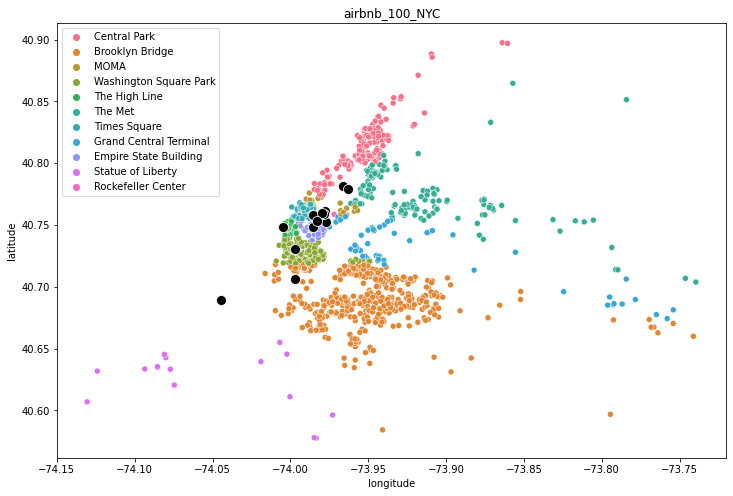

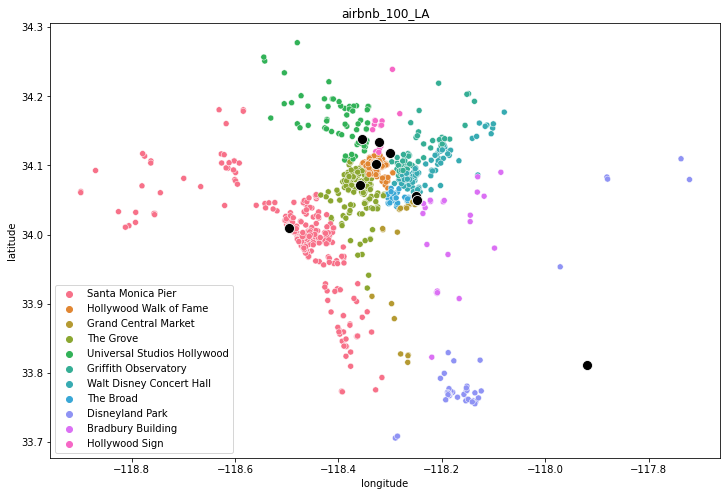

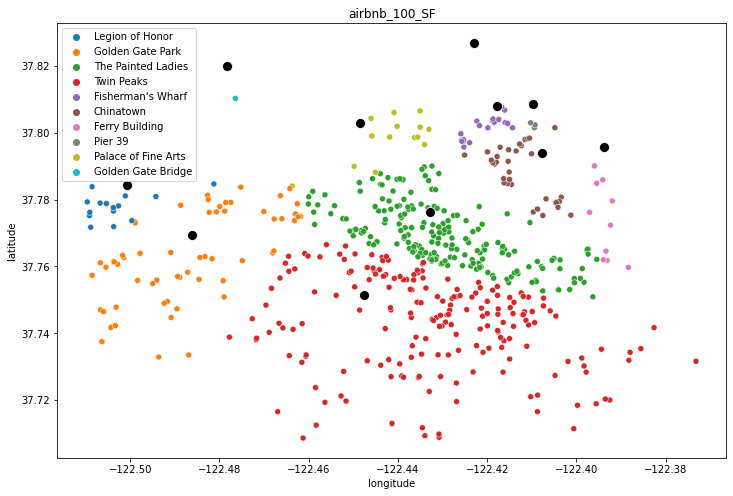

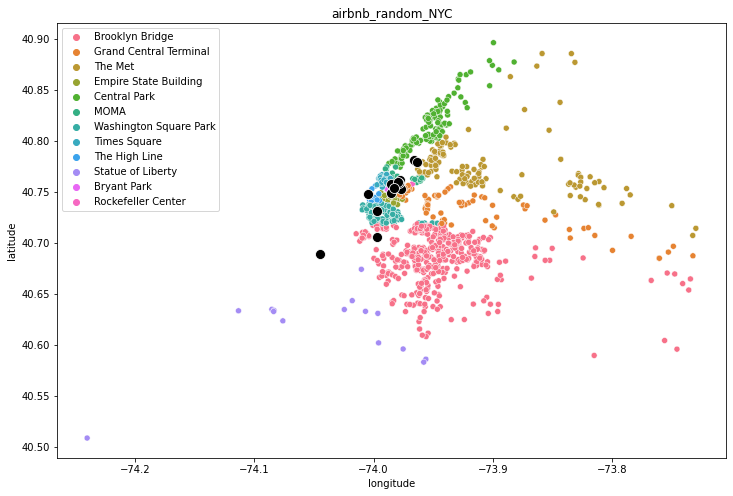

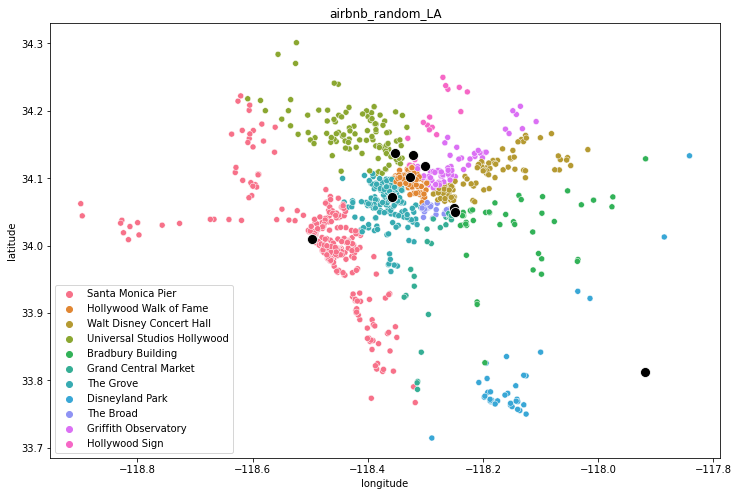

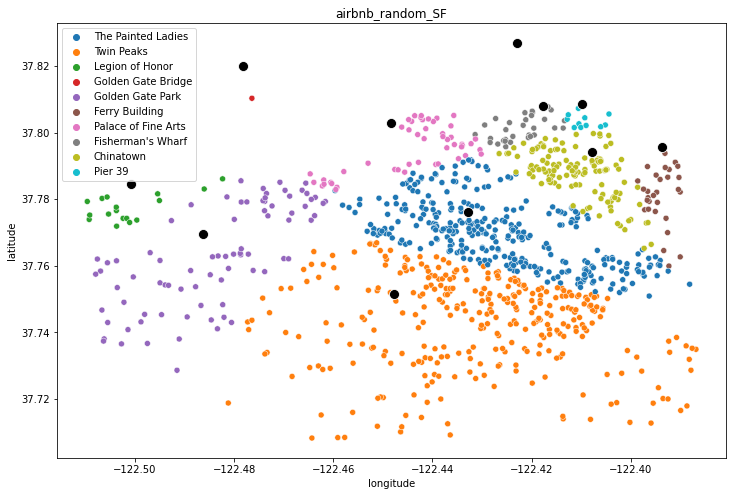

In [ ]:
plt.rcParams['figure.figsize'] = (12, 8)

title_list = ['airbnb_100_NYC', 'airbnb_100_LA', 'airbnb_100_SF',
             'airbnb_random_NYC', 'airbnb_random_LA', 'airbnb_random_SF']
data_list = [airbnb_100_NYC, airbnb_100_LA, airbnb_100_SF,
             airbnb_random_NYC, airbnb_random_LA, airbnb_random_SF]
landmarks_list = [landmarks_NYC, landmarks_LA, landmarks_SF,
                  landmarks_NYC, landmarks_LA, landmarks_SF]

for title, data, lm in zip(title_list, data_list, landmarks_list):
  plt.title(title)
  sns.scatterplot(data=data,
                  x=data['longitude'],
                  y=data['latitude'],
                  hue=data['landmark'])
  sns.scatterplot(data=lm,
                  x=lm['longitude'],
                  y=lm['latitude'],
                  s=100,
                  color='black')
  plt.show()

In [1]:
import pandas as pd
df = pd.read_excel('airbnb_top_bottom.xlsx')
df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61235 entries, 0 to 61234
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   id                      61235 non-null  int64         
 1   log_price               61235 non-null  float64       
 2   property_type           61235 non-null  object        
 3   room_type               61235 non-null  object        
 4   amenities               61235 non-null  object        
 5   accommodates            61235 non-null  int64         
 6   bathrooms               61053 non-null  float64       
 7   bed_type                61235 non-null  object        
 8   cancellation_policy     61235 non-null  object        
 9   cleaning_fee            61235 non-null  bool          
 10  city                    61235 non-null  object        
 11  description             61230 non-null  object        
 12  first_review            48008 non-null  dateti